In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [2]:
!pip install pytesseract

In [3]:
import re
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
from pytesseract import Output

def mask(IMG_PATH):
  img = cv2.imread(IMG_PATH)
  def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  def thresholding(image):
    # Tuned threshold values to accurately determine digits (Helped in Image3)
    return cv2.threshold(image, 107, 255, cv2.THRESH_BINARY)[1]

  # Converted image to grayscale and applied binary threshold
  gray = get_grayscale(img)
  thresh = thresholding(gray)

  # PSM = 12 to find as much text as possible, independent of the orientation of image (Helped in Image2)
  d = pytesseract.image_to_data(thresh, lang='eng', output_type=Output.DICT, config=r'--oem 3 --psm 12')
  keys = list(d.keys())
  
  # Regex pattern to obtain exactly 4 digits
  re_pattern = '[0-9]{4}$'
  lists = []
  output = []
  dictionary = {}
  n_boxes = len(d['text'])
  for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
      if re.match(re_pattern, d['text'][i]):
        # Saving all outputs which have matched our regex pattern
        output.append(d['text'][i])
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Here we will save heights of bounding boxes in a dictionary
        dictionary.update({i:h})
        lists.append([x,y,w,h,i])
  # Now we will store values of the top 3 bounding boxes with maximum heights
  # This is done to discard other 4 digit numbers in the image
  dictionary = sorted(dictionary.items(), key=lambda x: x[1])
  l1=0
  ctr=-1
  for i in lists:
    ctr+=1
    for k in dictionary:
      if k[0]==i[-1]:
        l1+=1
        if l1>2:
          break
        else:
          img_final = cv2.rectangle(img, (lists[ctr][0], lists[ctr][1]), (lists[ctr][0] + lists[ctr][2], lists[ctr][1] + lists[ctr][3]), (255, 255, 255), -1)
  # Print AADHAAR number
  print("AADHAAR Number : ", end='')
  for o in range(3):
    print(output[o], end=' ')
  print('\n')
  cv2_imshow(img_final)

In [4]:
imgs = ['aadhaarimage1.jpeg', 'aadhaarimage2.jpeg', 'aadhaarimage3.png']

AADHAAR Number : 3429 2099 3643 



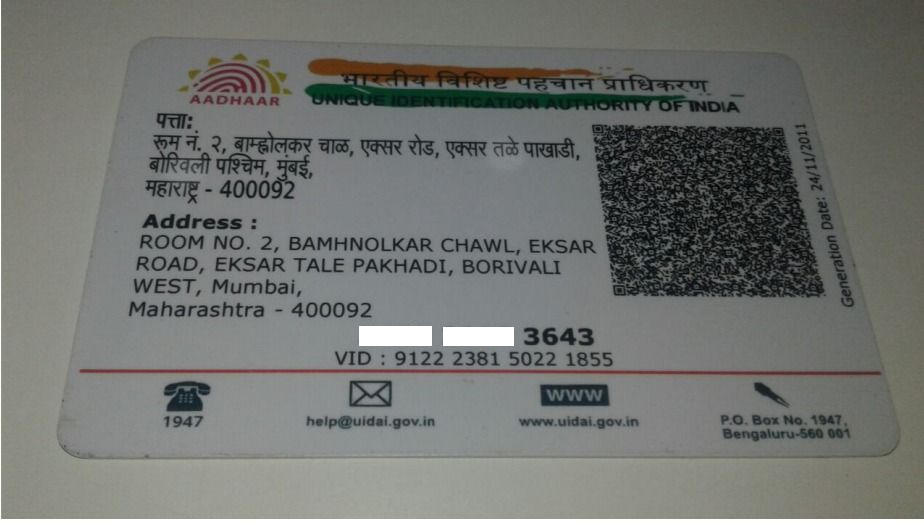

In [5]:
mask(imgs[0])

AADHAAR Number : 4728 9473 9406 



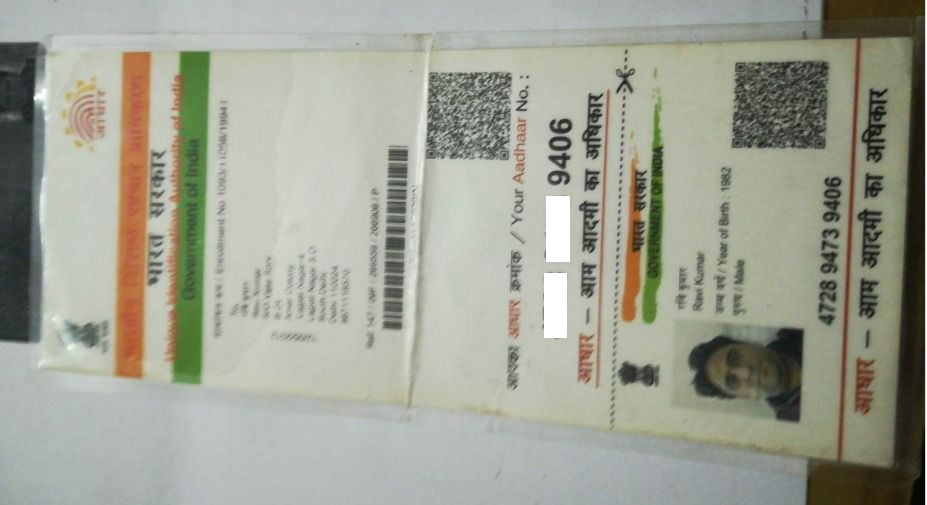

In [6]:
mask(imgs[1])

AADHAAR Number : 3171 6982 2729 



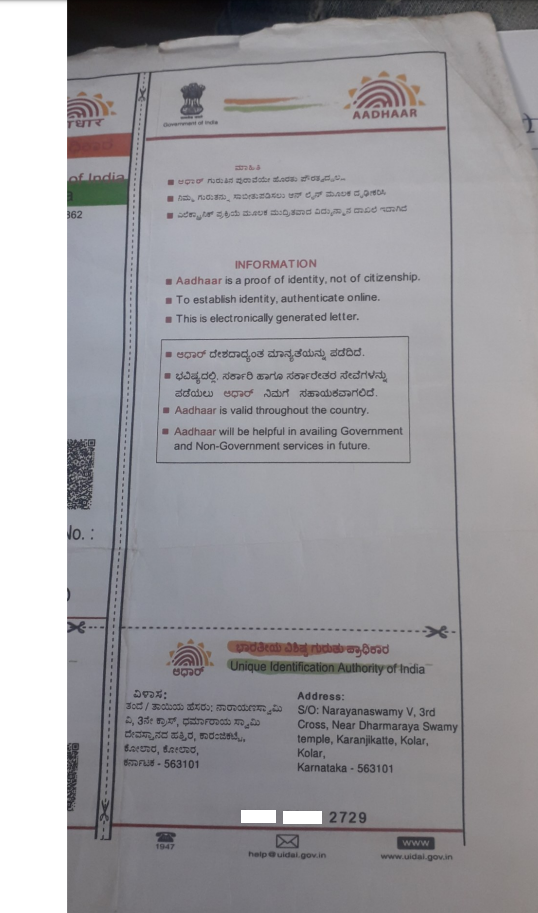

In [7]:
mask(imgs[2])

In [8]:
# Future Works : If the AADHAAR Number exists multiple times in the image (like in Image2), mask them too.